# Plot PDFs for different IVT attributes for regional control ICON experiment forced by CNMR (1984-2014)

In [8]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import seaborn as sns
import os

from src.utils import load_pkl, create_datetime_lists, get_datetime_str
from src.Enumerations import Month, Season
from src.xarray_util import create_obj_from_dict,  ObjectContainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Settings

In [2]:
input_path = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_remapped_3x/'
type_='IVT'
input_file_name_temp = 'MOAPP_ICON_100and85controlperc_remapped_3x'
#input_field_grid= '/work/aa0238/a271093/data/input/IVT_85_percentiles_CNMR_control_3dx3dy.nc'
#GridPoint.input_field_grid = input_field_grid

first_year = 1984
last_year = 2013
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [4]:
# create datetime lists
start_date_list, end_date_list = create_datetime_lists(first_year,last_year, months=6, correct_last_endtime=False) 
first_processed_date = start_date_list[0]
last_processed_date = end_date_list[-1]


# create and append Tracking objects to list
IVTobj_ls=ObjectContainer([])

for start_date, end_date in zip(start_date_list, end_date_list):
    print(start_date)
    pickle_file_path = f'{input_path}{type_}_{input_file_name_temp}_{get_datetime_str(start_date)}-{get_datetime_str(end_date)}_corrected'
    
    dict_ = load_pkl(pickle_file_path)
    

    for object_id in dict_.keys():
        try:
            ds = create_obj_from_dict(dict_,
                                      object_id,
                                      load_coordinates=False
                                  
                                     )
        except ValueError as ex:
            continue
        
        IVTobj_ls.append(ds)
    


1984-01-01 00:00:00
1984-07-01 00:00:00
1985-01-01 00:00:00
1985-07-01 00:00:00
1986-01-01 00:00:00
1986-07-01 00:00:00
1987-01-01 00:00:00
1987-07-01 00:00:00
1988-01-01 00:00:00
1988-07-01 00:00:00
1989-01-01 00:00:00
1989-07-01 00:00:00
1990-01-01 00:00:00
1990-07-01 00:00:00
1991-01-01 00:00:00
1991-07-01 00:00:00
1992-01-01 00:00:00
1992-07-01 00:00:00
1993-01-01 00:00:00
1993-07-01 00:00:00
1994-01-01 00:00:00
1994-07-01 00:00:00
1995-01-01 00:00:00
1995-07-01 00:00:00
1996-01-01 00:00:00
1996-07-01 00:00:00
1997-01-01 00:00:00
1997-07-01 00:00:00
1998-01-01 00:00:00
1998-07-01 00:00:00
1999-01-01 00:00:00
1999-07-01 00:00:00
2000-01-01 00:00:00
2000-07-01 00:00:00
2001-01-01 00:00:00
2001-07-01 00:00:00
2002-01-01 00:00:00
2002-07-01 00:00:00
2003-01-01 00:00:00
2003-07-01 00:00:00
2004-01-01 00:00:00
2004-07-01 00:00:00
2005-01-01 00:00:00
2005-07-01 00:00:00
2006-01-01 00:00:00
2006-07-01 00:00:00
2007-01-01 00:00:00
2007-07-01 00:00:00
2008-01-01 00:00:00
2008-07-01 00:00:00


# Total number of IVT-object occurrences per season over domain

Text(0.5, 1.0, 'Total count of IVT occurrences over entire domain')

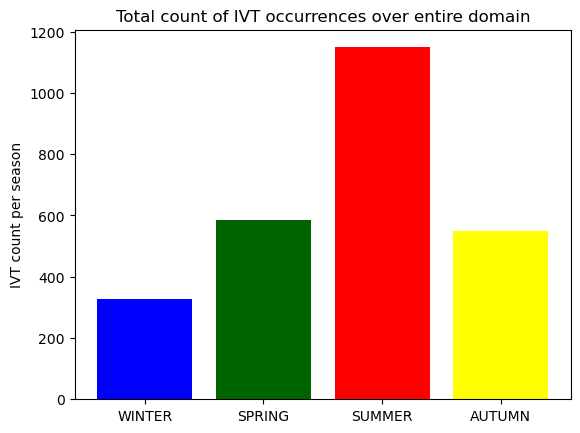

In [14]:
fig, ax = plt.subplots()

seasons = [x.name for x in Season]
colors = ['blue', 'darkgreen', 'red', 'yellow']


counts=[]
for season_ in Season:
    counts.append((IVTobj_ls.sel_season(season=season_).count())/num_years)

    
ax.bar(seasons, counts, color=colors)

ax.set_ylabel('IVT count per season')
ax.set_title('Total count of IVT occurrences over entire domain')


# Duration of IVT-objects

(9.0, 90.0)

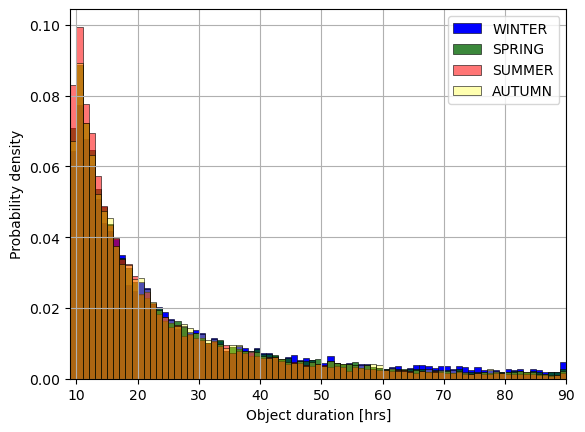

In [15]:
fig, ax = plt.subplots()
bar_labels = ['red', 'blue', '_green', 'brown','ff']
bar_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:brown','tab:gray']

for i,season_ in enumerate(Season):

    dat=IVTobj_ls.sel_season(season=season_).get_attributes(attr='duration')##obj_means("size")

    sns.histplot(dat,label=season_.name,alpha=1-(i*0.23),color=colors[i],bins=81, binrange=(9,90), stat='density')
    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(9,90)


# Median Size of IVT-objects

(0.0, 250000.0)

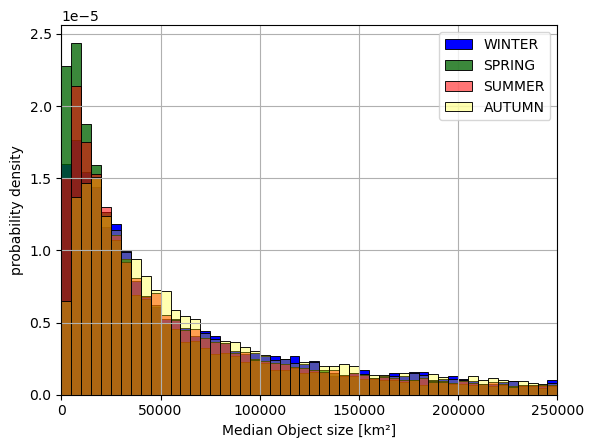

In [20]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):


    dat=IVTobj_ls.sel_season(season=season_).obj_medians(attr='size')##obj_means("size")
    sns.histplot(dat,label=season_.name,alpha=1-(i*0.23),color=colors[i],bins=50, binrange=(0,250000), stat='density')

   

ax.set_xlabel('Median Object size [km²]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,250000)

# Median Total IVT content of IVT-objects

(0.0, 26000.0)

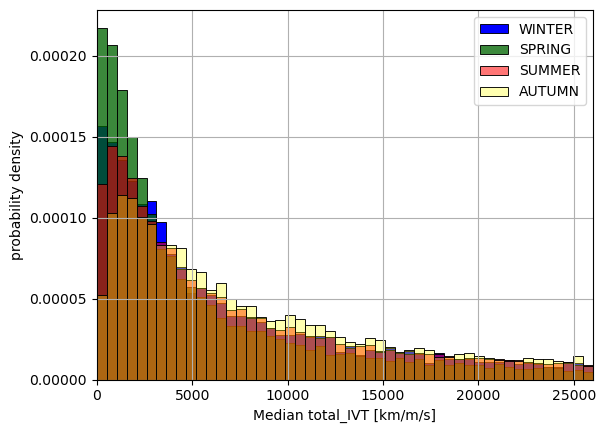

In [21]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):


    dat=IVTobj_ls.sel_season(season=season_).obj_medians(attr='total_IVT')##obj_means("size")
    
    sns.histplot(dat,label=season_.name,alpha=1-(i*0.23),color=colors[i],bins=50, binrange=(0,26000), stat='density')



ax.set_xlabel('Median total_IVT [km/m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,26000)

# Median speed of IVT-objects

/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:172: RuntimeWarning: All-NaN slice encountered
  return np.nanmedian(getattr(self._obj.get, attr))
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:172: RuntimeWarning: All-NaN slice encountered
  return np.nanmedian(getattr(self._obj.get, attr))
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:172: RuntimeWarning: All-NaN slice encountered
  return np.nanmedian(getattr(self._obj.get, attr))
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:172: RuntimeWarning: All-NaN slice encountered
  return np.nanmedian(getattr(self._obj.get, attr))


(0.0, 70.0)

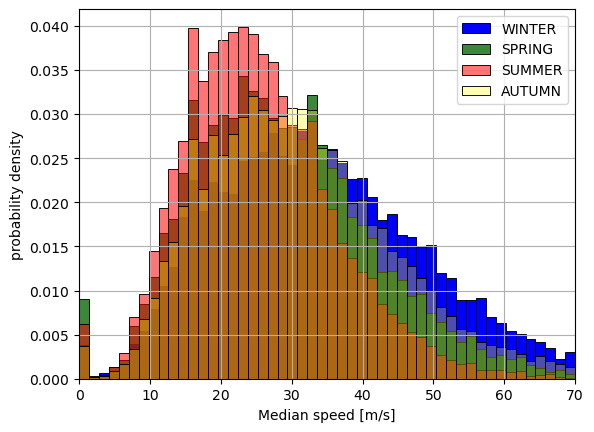

In [22]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):


    dat=IVTobj_ls.sel_season(season=season_).obj_medians(attr='speed')##obj_means("size")
    
    sns.histplot(dat,label=season_.name,alpha=1-(i*0.23),color=colors[i],bins=50, binrange=(0,70), stat='density')
    

ax.set_xlabel('Median speed [m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,70)

# Divide IVT object into different classes:
- Small objects: Median total IVT smaller than the 0.33 quantile
- Medium objects: Median total IVT larger than the 0.33 quantile and smaller than 0.66 quantile
- Large objects: Median total IVT larger than the 0.66 quantile


In [16]:
q033 = IVTobj_ls.quantile(attr='total_IVT', quant = 0.33)
q066 = IVTobj_ls.quantile(attr='total_IVT', quant = 0.66)


In [17]:
small_objs =  IVTobj_ls.filter_by_median(threshold = q033, attr = 'total_IVT', above=False)
medium_objs =  IVTobj_ls.filter_by_median(threshold = q033, attr = 'total_IVT', above=True).filter_by_median(threshold = q066, attr = 'total_IVT', above=False)
large_objs =  IVTobj_ls.filter_by_median(threshold = q066, attr = 'total_IVT', above=True)

objs = [small_objs, medium_objs, large_objs]

# Median Total IVT of object

(0.0, 36000.0)

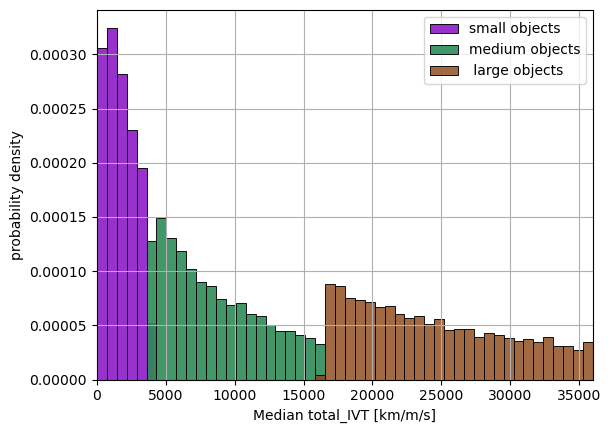

In [18]:
fig, ax = plt.subplots()

labels = ['small objects', 'medium objects', ' large objects']
colors = ['grey', 'cornflowerblue','saddlebrown']
colors = ['darkorchid', 'seagreen','saddlebrown']


range_=(0,36000)
for i in range(len(objs)):


    dat=objs[i].obj_medians(attr='total_IVT')##obj_means("size")
    
    sns.histplot(dat,label=labels[i],alpha=1-(i*0.1),color=colors[i],bins=50, binrange=range_, stat='density')

ax.set_xlabel('Median total_IVT [km/m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(range_)

# Median speed of objects

/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:172: RuntimeWarning: All-NaN slice encountered
  return np.nanmedian(getattr(self._obj.get, attr))


(0.0, 70.0)

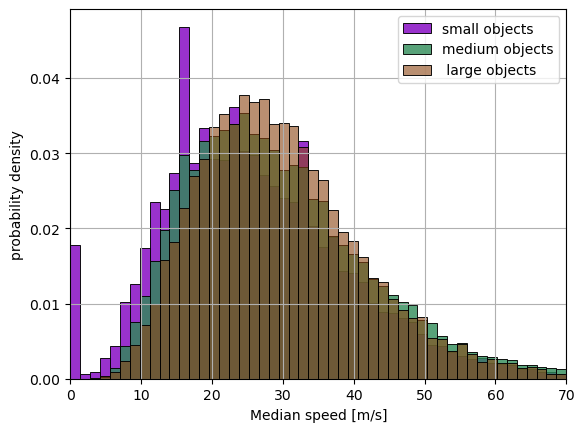

In [19]:
fig, ax = plt.subplots()
range_=(0,70)
for i in range(len(objs)):


    #dat=objs[i].sel_season(season=Season.WINTER).obj_medians(attr='speed')##obj_means("size")
    dat=objs[i].obj_medians(attr='speed')##obj_means("size")

    sns.histplot(dat,label=labels[i],alpha=1-(i*0.2),color=colors[i],bins=50, binrange=range_, stat='density')

ax.set_xlabel('Median speed [m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(range_)

# Duration of objects

(9.0, 90.0)

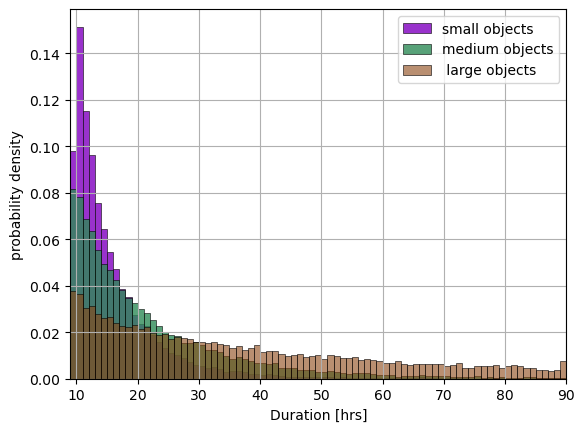

In [20]:
fig, ax = plt.subplots()
range_=(9,90)

for i in range(len(objs)):


    dat=objs[i].obj_medians(attr='duration')##obj_means("size")
    
    sns.histplot(dat,label=labels[i],alpha=1-(i*0.2),color=colors[i],bins=81, binrange=range_, stat='density')

ax.set_xlabel('Duration [hrs]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(range_)